In [100]:
from tqdm import tqdm
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load  # for saving and loading models
import warnings
warnings.filterwarnings('ignore')   

# seeding is important for reproducibility in model development and testing

RANDOM_SEED = 123
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [101]:
train = pd.read_csv('data/tabular-playground-series-jul-2021/train.csv')
test = pd.read_csv('data/tabular-playground-series-jul-2021/test.csv')
submission = pd.read_csv('data/tabular-playground-series-jul-2021/sample_submission.csv')

In [102]:
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [103]:
test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [104]:
train.shape

(7111, 12)

In [105]:
train.dtypes

date_time                  object
deg_C                     float64
relative_humidity         float64
absolute_humidity         float64
sensor_1                  float64
sensor_2                  float64
sensor_3                  float64
sensor_4                  float64
sensor_5                  float64
target_carbon_monoxide    float64
target_benzene            float64
target_nitrogen_oxides    float64
dtype: object

In [106]:
train.date_time = pd.to_datetime(train.date_time)
test.date_time = pd.to_datetime(test.date_time)

In [107]:
train.date_time.head(15)

0    2010-03-10 18:00:00
1    2010-03-10 19:00:00
2    2010-03-10 20:00:00
3    2010-03-10 21:00:00
4    2010-03-10 22:00:00
5    2010-03-10 23:00:00
6    2010-03-11 00:00:00
7    2010-03-11 01:00:00
8    2010-03-11 02:00:00
9    2010-03-11 03:00:00
10   2010-03-11 04:00:00
11   2010-03-11 05:00:00
12   2010-03-11 06:00:00
13   2010-03-11 07:00:00
14   2010-03-11 08:00:00
Name: date_time, dtype: datetime64[ns]

In [108]:
train.date_time[1], train.date_time[len(train)-1], test.date_time[1], test.date_time[len(test)-1]

(Timestamp('2010-03-10 19:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-01-01 01:00:00'),
 Timestamp('2011-04-04 14:00:00'))

<AxesSubplot:>

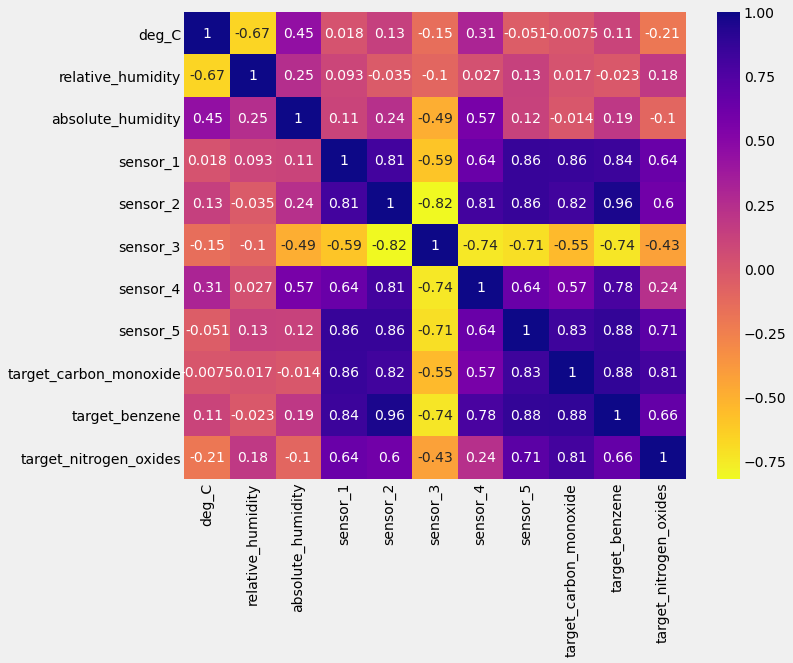

In [109]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap='plasma_r', annot=True)

- Here the targests are highly correlated with sensor data...
- Even sensor features are highly correlated with each other and in general correalted features are dropped but here we pass them to the model as we have low features and see what happens

In [110]:
train.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

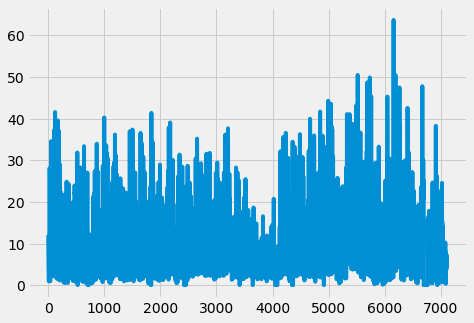

In [111]:
#  how targets are varying according in time 
plt.plot(train.target_benzene)

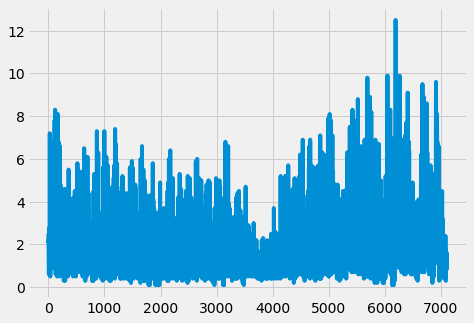

In [112]:
plt.plot(train.target_carbon_monoxide)

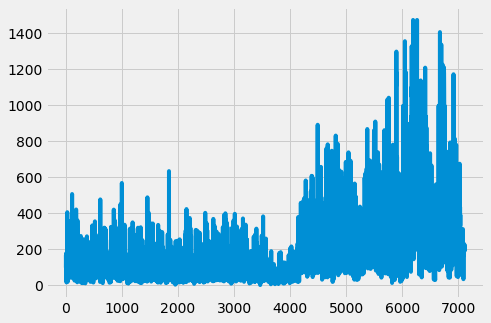

In [113]:
plt.plot(train.target_nitrogen_oxides)

In [114]:
def plot(i):
    data = i
    fig, ax = plt.subplots(1,4,figsize=(20,5))
    sns.kdeplot(data,ax=ax[0])
    sns.kdeplot(np.log(data),ax=ax[1])
    sns.kdeplot(np.sqrt(data),ax=ax[2])
    sns.kdeplot(np.cbrt(data),ax=ax[3])
    ax[0].set_title('Raw')
    ax[1].set_title('Log')
    ax[2].set_title('Sqrt')
    ax[3].set_title('cuberoot')

In [115]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.style.use('fivethirtyeight')

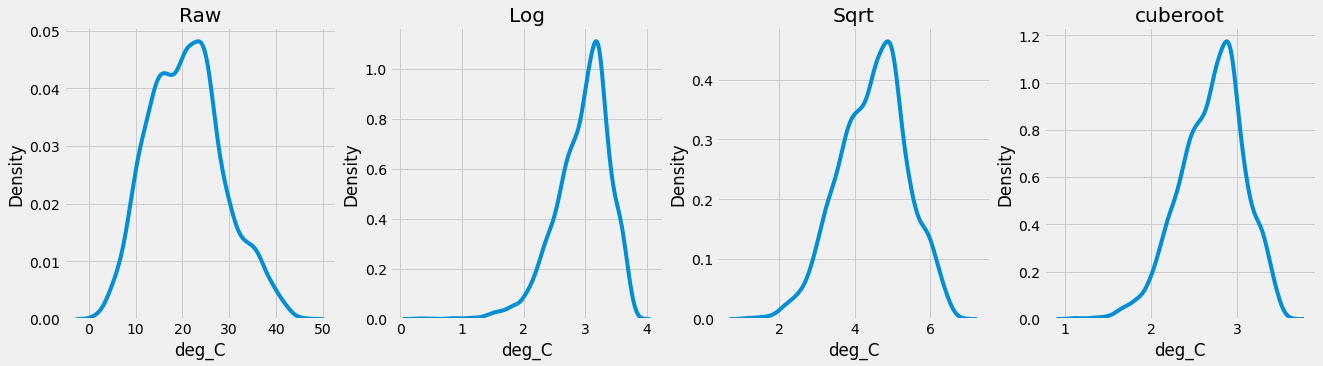

In [116]:
plot(train.deg_C)

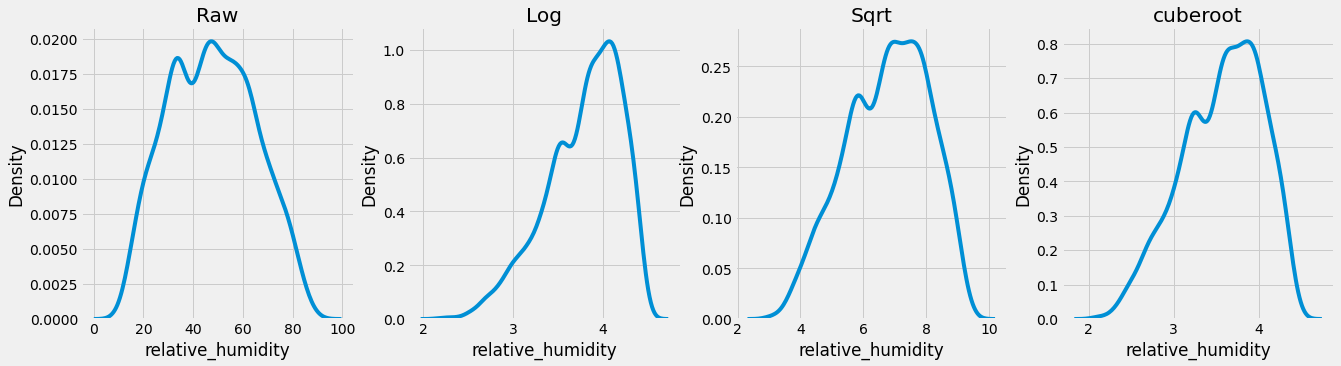

In [117]:
plot(train.relative_humidity)

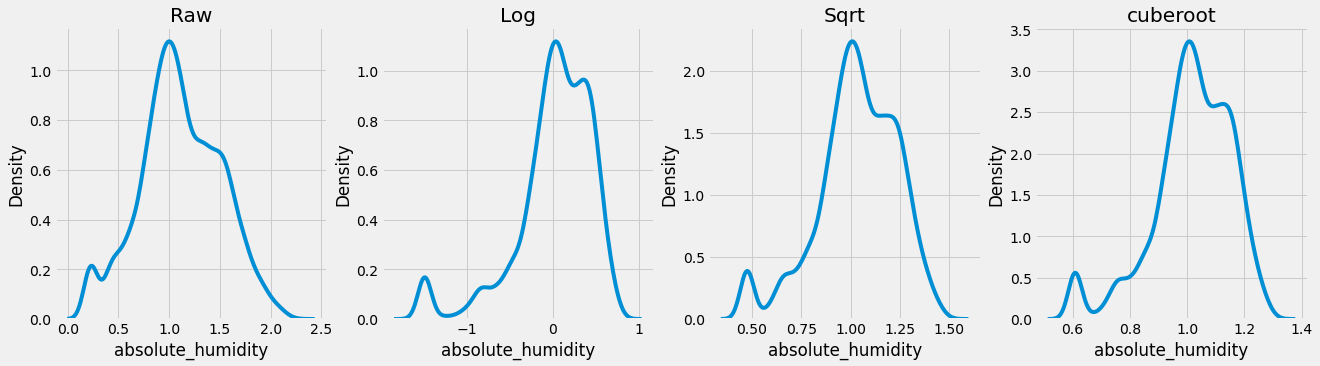

In [118]:
plot(train.absolute_humidity)

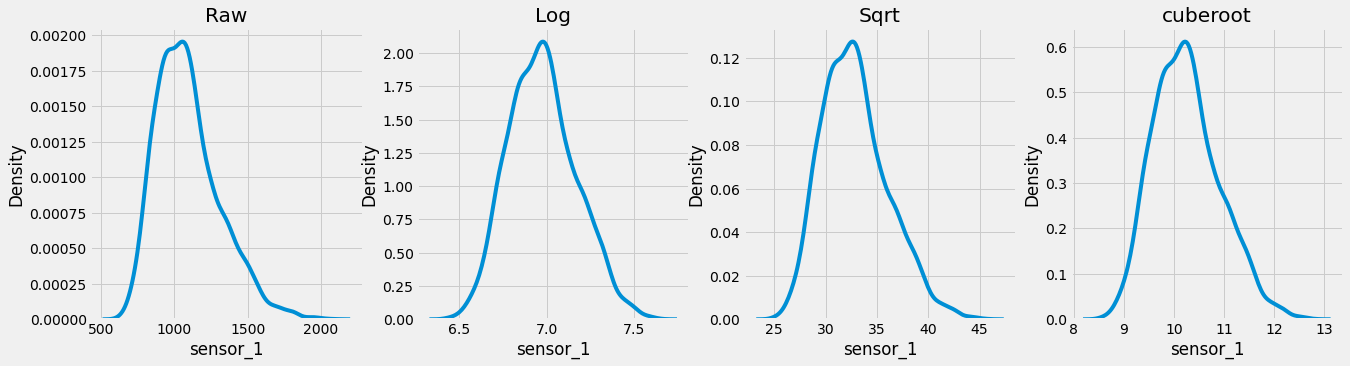

In [119]:
plot(train.sensor_1)

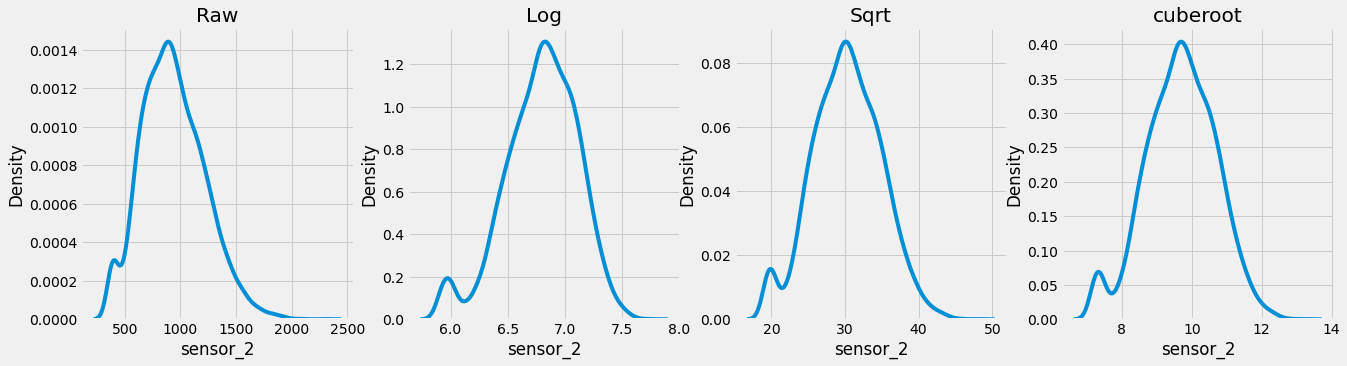

In [120]:
plot(train.sensor_2)

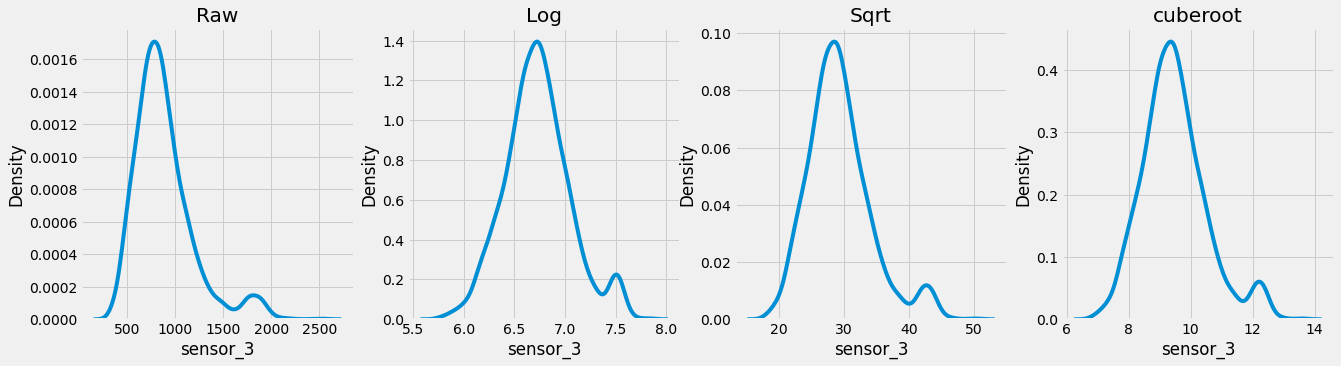

In [121]:
plot(train.sensor_3)

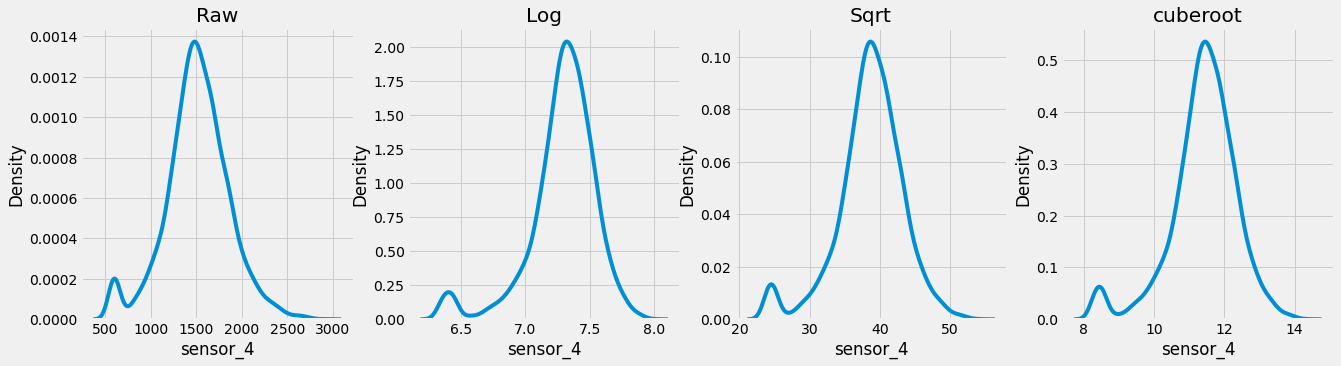

In [122]:
plot(train.sensor_4)

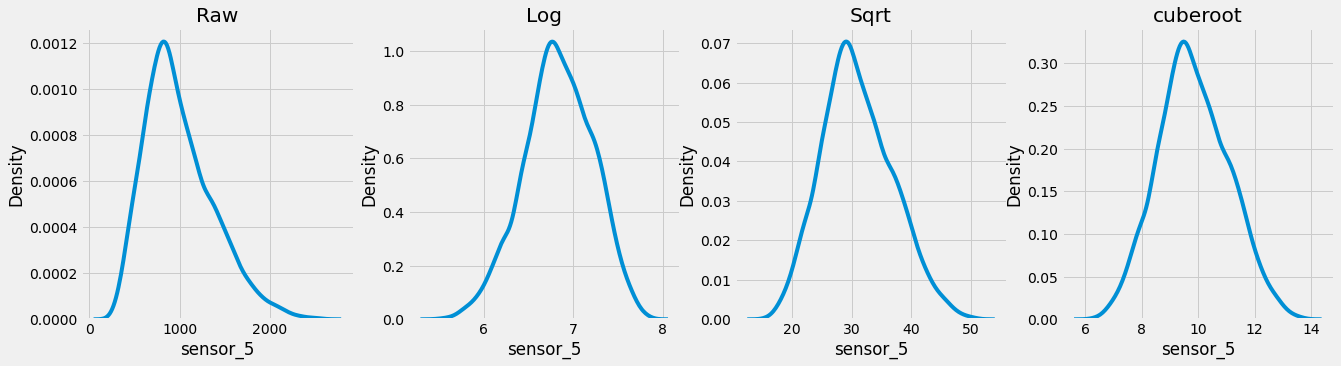

In [123]:
plot(train.sensor_5)

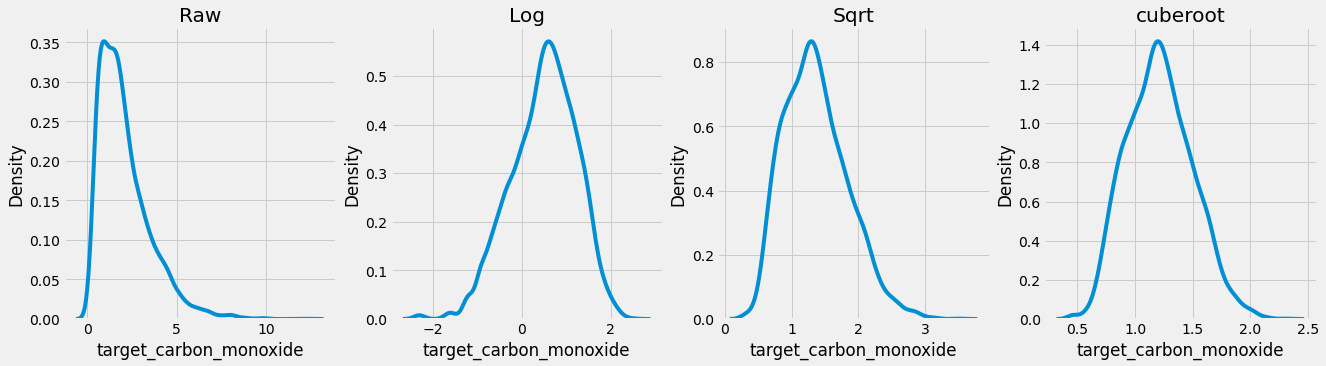

In [124]:
plot(train.target_carbon_monoxide)

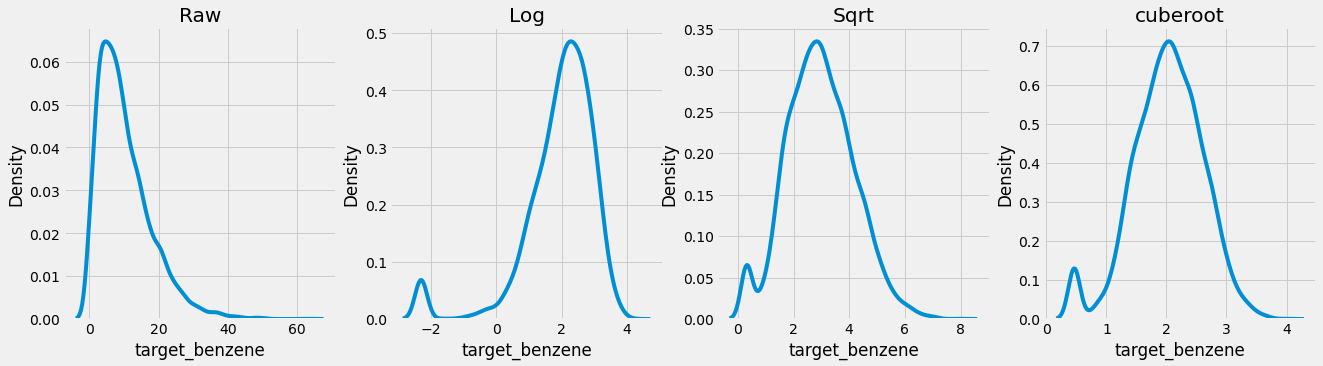

In [125]:
plot(train.target_benzene)

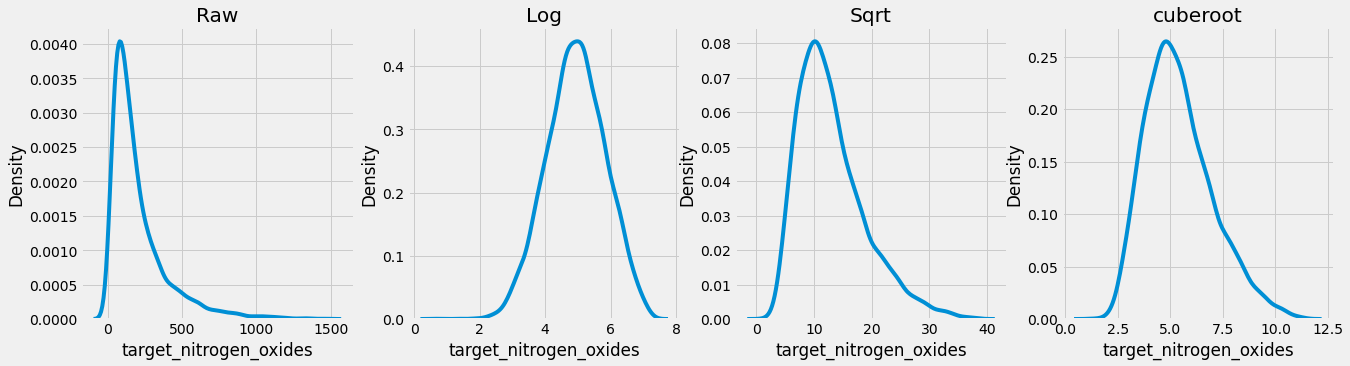

In [126]:
plot(train.target_nitrogen_oxides)

In [127]:
# this shows all avaiable plotting styles in matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [128]:
train.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [129]:
train.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [130]:
# check if any samples are same
train.duplicated().sum()

0

In [131]:
# check null values
train.isnull().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [132]:
#  since we are using tree based models we don't need to normalizing data coz these kind of models can build on simple rules like:
#  if sensor_1 > 234.0 : then target_benzene = 1 or something else

In [134]:
train.drop(['date_time'], axis=1, inplace=True)
train

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [135]:
targets = ['target_benzene', 'target_carbon_monoxide', 'target_nitrogen_oxides']

In [143]:
# this is absolutely wrong cause it introduces leakeage...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(targets,axis=1), train[targets], test_size=0.2, random_state=RANDOM_SEED)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5688, 8), (1423, 8), (5688, 3), (1423, 3))

In [153]:
from xgboost import XGBRegressor
xgb_1 = XGBRegressor(tree_method='gpu_hist',random_state=RANDOM_SEED)

In [154]:
%%time
xgb_1.fit(X_train, y_train[targets[0]])

Wall time: 1.37 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [156]:
y1_preds = xgb_1.predict(X_test)
y1_preds

array([ 7.024097 , 20.070856 ,  9.542732 , ...,  5.8813496, 14.09557  ,
       10.855451 ], dtype=float32)

In [157]:
from sklearn.metrics import mean_squared_log_error as msle
error = msle(y_test[targets[0]], y1_preds)
print(np.sqrt(error))
# these errors seem good but they are wrong...

0.092183754764686


In [159]:
print(targets[1])
xgb_2 = XGBRegressor(tree_method='gpu_hist',random_state=RANDOM_SEED)
xgb_2.fit(X_train, y_train[targets[1]])
y2_preds = xgb_2.predict(X_test)
error_2 = np.sqrt(msle(y_test[targets[1]], y2_preds))
print(error_2)

target_carbon_monoxide
0.14114127259840026


In [169]:
print(targets[2])
xgb_3 = XGBRegressor(tree_method='gpu_hist',random_state=RANDOM_SEED)
xgb_3.fit(X_train, y_train[targets[2]])
y3_preds = xgb_3.predict(X_test)
y3_preds = np.clip(y3_preds, 0, None)
error_3 = np.sqrt(msle(y_test[targets[2]], y3_preds))
print(error_3)

target_nitrogen_oxides
0.3814416110588494


In [171]:
np.mean([error, error_2, error_3])

0.17702690943325514

In [175]:
test1_preds = xgb_1.predict(test.drop(['date_time'], axis=1))
test2_preds = xgb_2.predict(test.drop(['date_time'], axis=1))
test3_preds = xgb_3.predict(test.drop(['date_time'], axis=1))

In [183]:
submission.target_benzene = test1_preds
submission.target_carbon_monoxide = test2_preds
submission.target_nitrogen_oxides = test3_preds

In [184]:
submission.to_csv('xgb_starter_submission.csv', index=False)
#  this scored 0.23 on test set far.. off from validation score --> coz of wrong validation due to leakage....

In [ ]:
# But splitting the data based on time might not be a good validation coz we have only a year data.
# validation split may not be reprsentative of the test set and train set.

**further ideas**
- lots of other features like month, day, hour, session of day(morning , afternoon, evening, night), rolling average of targets, other rolling features etc...
- try different models
- stacked ensembles


In [ ]:
# # Plot dependence between every feature and the target
# fig, axs = plt.subplots(4, 4, figsize=(16, 16))
# for f, ax in zip(float_features, axs.ravel()):
#     temp = pd.DataFrame({f: train[f].values,
#                          'state': train.target.values})
#     temp = temp.sort_values(f)
#     temp.reset_index(inplace=True)
#     ax.scatter(temp[f], temp.state.rolling(15000, center=True).mean(), s=2)
#     ax.set_xlabel(f'{f}')
# plt.suptitle('How the target probability depends on single features')
# plt.show()